In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('manufacturing.csv')
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [6]:
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


<Axes: xlabel='Temperature (°C)', ylabel='Quality Rating'>

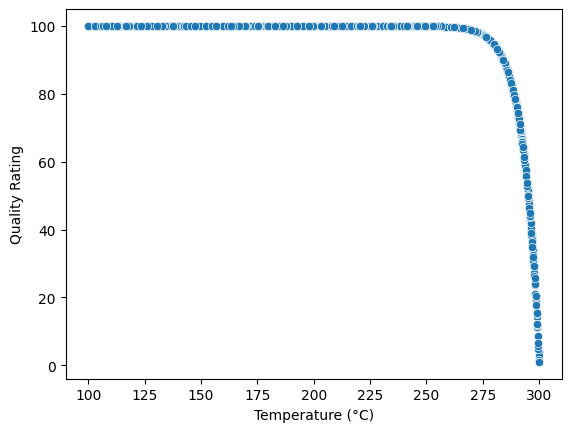

In [24]:
sns.scatterplot(x=df['Temperature (°C)'],y=df['Quality Rating'])

<Axes: xlabel='Pressure (kPa)', ylabel='Quality Rating'>

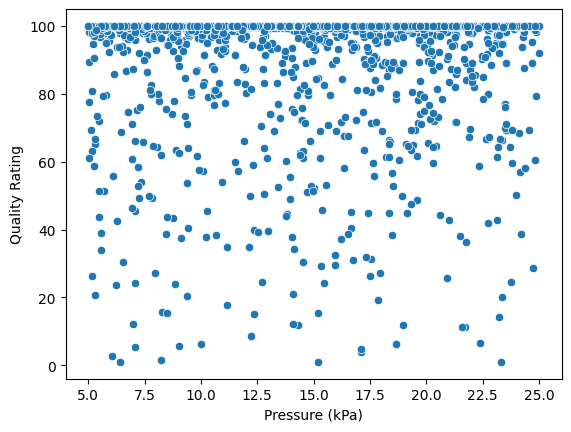

In [28]:
sns.scatterplot(x=df['Pressure (kPa)'],y=df['Quality Rating'])

<Axes: xlabel='Material Transformation Metric', ylabel='Quality Rating'>

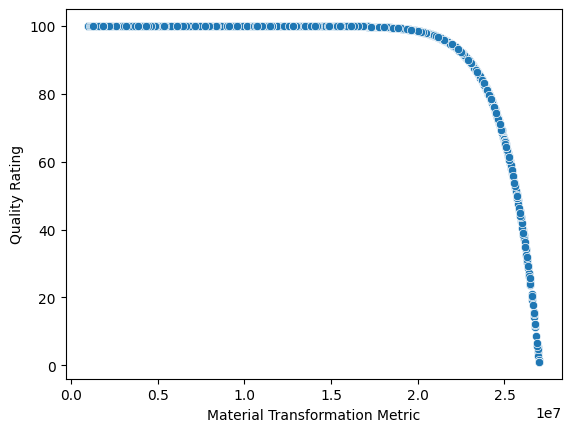

In [26]:
sns.scatterplot(x=df['Material Transformation Metric'],y=df['Quality Rating'])

<Axes: xlabel='Material Fusion Metric', ylabel='Quality Rating'>

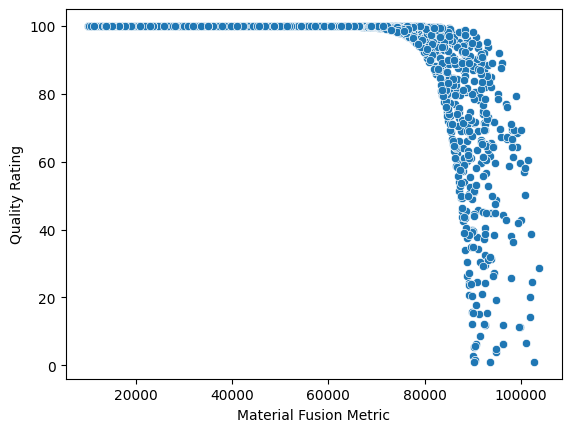

In [29]:
sns.scatterplot(x=df['Material Fusion Metric'],y=df['Quality Rating'])

In [32]:
x=df.drop(columns='Quality Rating')
Y=df['Quality Rating']

In [33]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()


X = scale.fit_transform(X)
X=pd.DataFrame(X,columns=x.columns)
X

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
0,0.167354,-1.172126,-0.868667,-0.151411,-0.106191
1,0.739797,0.172666,0.608769,0.625539,0.568398
2,0.352977,-1.208119,-0.840510,0.041949,0.091063
3,0.153831,1.554332,1.382277,0.378076,-0.119861
4,-0.263275,0.170196,-0.025360,-0.422483,-0.491243
...,...,...,...,...,...
3952,-0.743581,1.209211,0.317053,-0.553787,-0.813455
3953,-0.037577,-1.130394,-0.901761,-0.353322,-0.301605
3954,0.710882,0.273136,0.686526,0.610290,0.529470
3955,0.154925,1.558464,1.386733,0.380895,-0.118764


<Axes: xlabel='Material Fusion Metric', ylabel='Quality Rating'>

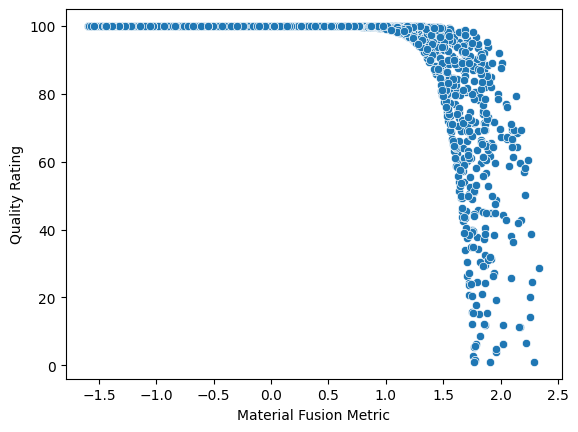

In [34]:
sns.scatterplot(x=X['Material Fusion Metric'],y=Y)

## applying linear regerssion

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3, random_state=42)

In [61]:
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [62]:
# prediction and r2 score
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.5077944610820524

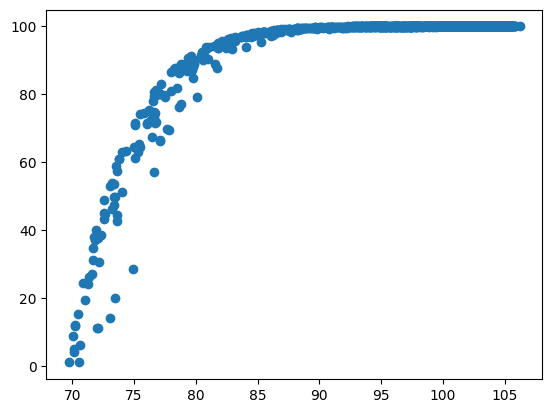

In [63]:

plt.scatter(y_pred,y_test)
plt.show()

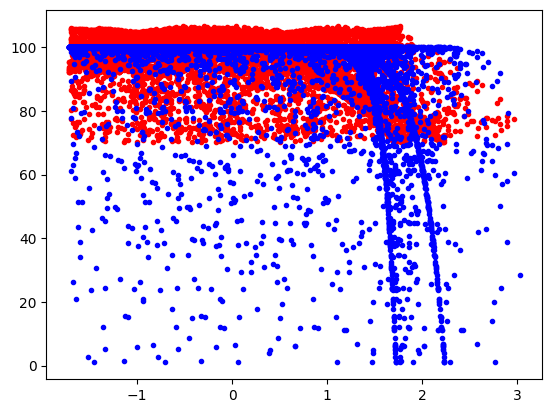

In [64]:
plt.plot(X_train,lr.predict(X_train),'r.')
plt.plot(X,Y, 'b.')
plt.show()

## Applying Polynomial regression


In [65]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [66]:
lr.fit(X_train_trans,y_train)

LinearRegression()

In [67]:
py_pred = lr.predict(X_test_trans)

In [68]:
r2_score(y_test,y_pred)

0.5077944610820524

In [69]:
lr.coef_

array([ 0.00000000e+00,  8.34765015e+03, -2.36535367e+03,  2.92149611e+03,
        7.32823006e+01, -1.07485146e+04,  1.38400018e+03, -5.92170533e+02,
        8.59667314e+01, -9.85087588e+01,  1.99465613e+03, -1.22241828e+01,
        9.19133198e+00, -4.67539096e+01, -1.70428903e+02,  3.44895844e+00,
        4.30069056e+01,  4.11685069e+01,  7.29839681e+00, -2.72660885e+01,
       -4.77748236e+02])

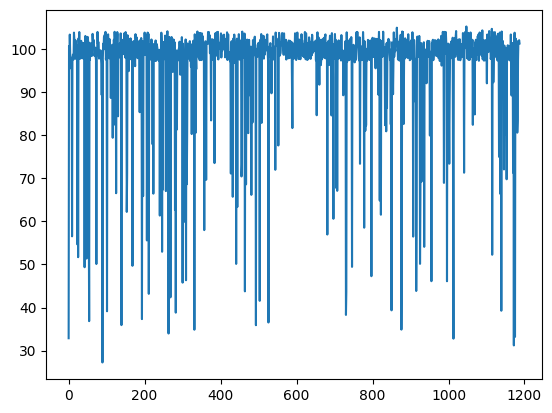

In [73]:
plt.plot(py_pred)

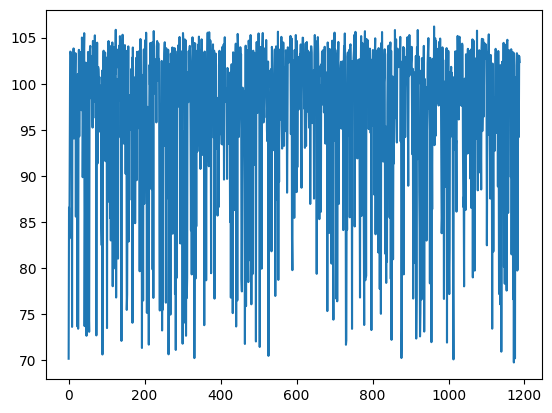

In [74]:
plt.plot(y_pred)